In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# pip install mat73

In [5]:
# import mat73

In [6]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [7]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [8]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
N_FEATURES = 8

In [11]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Class_label']


In [12]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [13]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [14]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [15]:
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave_WR/Total_process_TT/'
path='/media/naveen/nav/mat_codes/BioPatRec/prep_BP_D2_WR/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/Total_process_TT/'

In [16]:
# file_path_train=path+'Biopatrec_26class_17sub_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_26class_17sub_train_WR'+'.'+'csv'
file_path_train=path+'Biopatrec_26class_17sub_train_WR_BP_D2'+'.'+'csv'
# file_path_train=path+'nina_pro_noprep_DB2_Train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/BioPatRec/prep_BP_D2_WR/Total_process_TT/Biopatrec_26class_17sub_train_WR_BP_D2.csv


In [17]:
# file_path_test=path+'Biopatrec_26class_17sub_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_26class_17sub_test_WR'+'.'+'csv'
file_path_test=path+'Biopatrec_26class_17sub_test_WR_BP_D2'+'.'+'csv'
# file_path_test=path+'nina_pro_noprep_DB2_Test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/BioPatRec/prep_BP_D2_WR/Total_process_TT/Biopatrec_26class_17sub_test_WR_BP_D2.csv


In [18]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 15646800



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.000959,0.000827,0.000599,0.001285,0.000399,0.002158,0.000829,0.001169,1.0
1,0.007570,0.036742,0.008886,0.002891,0.005838,0.018472,0.010308,0.001062,1.0
2,0.005419,0.012710,0.009951,0.006429,0.007438,0.024049,0.020984,0.012403,1.0
3,0.001107,0.005340,0.005795,0.008826,0.003895,0.021941,0.016053,0.015449,1.0
4,0.001872,0.017886,0.007547,0.008543,0.008573,0.003699,0.021149,0.003348,1.0
5,0.001571,0.011978,0.002830,0.011135,0.001890,0.010421,0.029393,0.009311,1.0
6,0.000332,0.003536,0.000500,0.007400,0.010946,0.006786,0.006254,0.006610,1.0
7,0.015788,0.009890,0.013639,0.000312,0.005507,0.010842,0.008475,0.004766,1.0
8,0.010925,0.007702,0.003059,0.004190,0.012973,0.007881,0.004649,0.000317,1.0
9,0.003605,0.007391,0.001061,0.003048,0.006491,0.003245,0.001053,0.005089,1.0


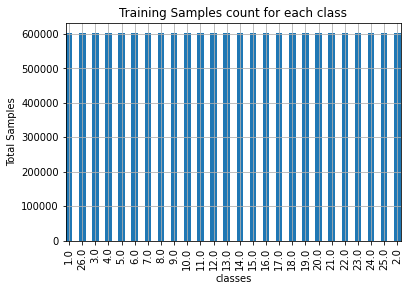

In [19]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [20]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 7823400



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.001941,0.001728,0.003601,0.001285,0.000255,0.000308,0.000888,0.000162,1.0
1,0.002542,0.000583,0.009173,0.028738,0.005735,0.016900,0.025485,0.027759,1.0
2,0.005645,0.005462,0.029742,0.012329,0.001331,0.012686,0.018839,0.012843,1.0
3,0.005735,0.015491,0.009079,0.004816,0.007868,0.004138,0.011742,0.005970,1.0
4,0.004456,0.009162,0.019869,0.005869,0.018661,0.000380,0.018459,0.011647,1.0
5,0.015954,0.013882,0.016077,0.001422,0.013586,0.012576,0.004827,0.006160,1.0
6,0.008541,0.000629,0.022128,0.011283,0.002206,0.012932,0.001866,0.000956,1.0
7,0.021701,0.001196,0.022945,0.010044,0.007621,0.009107,0.022170,0.002030,1.0
8,0.013430,0.002967,0.031372,0.004499,0.016713,0.004035,0.014271,0.003791,1.0
9,0.019955,0.005352,0.026665,0.008422,0.008242,0.002074,0.000386,0.006302,1.0


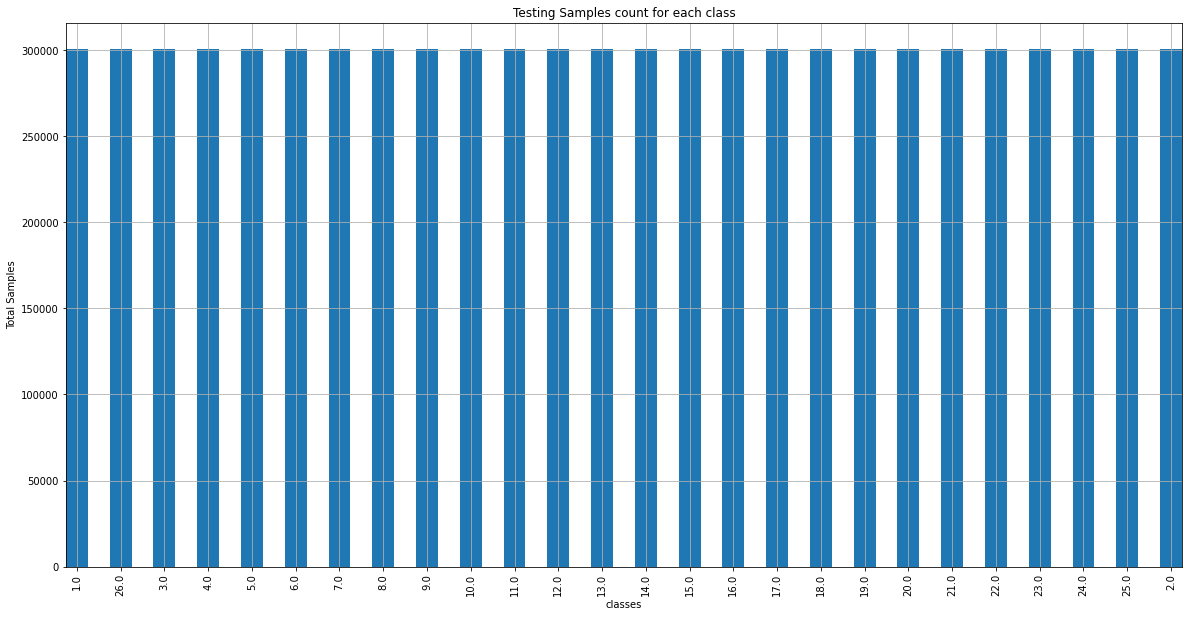

In [21]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [22]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.00096,0.00083,0.00060,0.00129,0.00040,0.00216,0.00083,0.00117,1.00000
1,0.00757,0.03674,0.00889,0.00289,0.00584,0.01847,0.01031,0.00106,1.00000
2,0.00542,0.01271,0.00995,0.00643,0.00744,0.02405,0.02098,0.01240,1.00000
3,0.00111,0.00534,0.00580,0.00883,0.00390,0.02194,0.01605,0.01545,1.00000
4,0.00187,0.01789,0.00755,0.00854,0.00857,0.00370,0.02115,0.00335,1.00000


In [23]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [24]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [25]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.52533,-0.44327,-0.43299,-0.38281,-0.38846,-0.35173,-0.36620,-0.46849,1.00000
1,-0.47084,-0.26079,-0.35938,-0.35647,-0.30593,-0.17930,-0.26890,-0.46995,1.00000
2,-0.48857,-0.38290,-0.34992,-0.29839,-0.28165,-0.12035,-0.15932,-0.31503,1.00000
3,-0.52410,-0.42035,-0.38684,-0.25905,-0.33541,-0.14263,-0.20993,-0.27342,1.00000
4,-0.51781,-0.35660,-0.37128,-0.26369,-0.26443,-0.33544,-0.15762,-0.43873,1.00000


In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.00194,0.00173,0.00360,0.00129,0.00025,0.00031,0.00089,0.00016,1.00000
1,0.00254,0.00058,0.00917,0.02874,0.00574,0.01690,0.02549,0.02776,1.00000
2,0.00564,0.00546,0.02974,0.01233,0.00133,0.01269,0.01884,0.01284,1.00000
3,0.00573,0.01549,0.00908,0.00482,0.00787,0.00414,0.01174,0.00597,1.00000
4,0.00446,0.00916,0.01987,0.00587,0.01866,0.00038,0.01846,0.01165,1.00000


In [27]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [28]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.51724,-0.43870,-0.40633,-0.38281,-0.39064,-0.37129,-0.36559,-0.48225,1.00000
1,-0.51228,-0.44452,-0.35683,0.06777,-0.30749,-0.19592,-0.11312,-0.10526,1.00000
2,-0.48671,-0.41972,-0.17412,-0.20155,-0.37431,-0.24046,-0.18134,-0.30902,1.00000
3,-0.48596,-0.36877,-0.35767,-0.32486,-0.27513,-0.33080,-0.25418,-0.40291,1.00000
4,-0.49651,-0.40092,-0.26182,-0.30757,-0.11137,-0.37052,-0.18524,-0.32536,1.00000


In [29]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size                C1       C2       C3       C4       C5       C6       C7  \
0        -0.52533 -0.44327 -0.43299 -0.38281 -0.38846 -0.35173 -0.36620   
1        -0.47084 -0.26079 -0.35938 -0.35647 -0.30593 -0.17930 -0.26890   
2        -0.48857 -0.38290 -0.34992 -0.29839 -0.28165 -0.12035 -0.15932   
3        -0.52410 -0.42035 -0.38684 -0.25905 -0.33541 -0.14263 -0.20993   
4        -0.51781 -0.35660 -0.37128 -0.26369 -0.26443 -0.33544 -0.15762   
...           ...      ...      ...      ...      ...      ...      ...   
15646795 -0.34347 -0.36550 -0.37890 -0.10795 -0.32685 -0.27527 -0.31904   
15646796 -0.38367 -0.37369 -0.38591  0.00164  0.09987 -0.27245 -0.32152   
15646797 -0.30300 -0.42659 -0.35229 -0.07749 -0.01551 -0.32002 -0.23079   
15646798 -0.34401 -0.41537 -0.12502 -0.20877 -0.29260 -0.34884 -0.22400   
15646799 -0.36356 -0.43086 -0.17840 -0.25731 -0.36112 -0.34520 -0.33390   

               C8  Class_label  ActivityEncoded  
0        -0.46849      1.00000     

In [30]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [31]:
# The number of steps within one time segment
TIME_PERIODS = 150
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 150

In [32]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (104311, 150, 8)
104311 training samples
y_train shape:  (104311,)
150
8
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
x_train shape: (150, 8)
input_shape: (150, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (104311, 26)


In [33]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (52155, 150, 8)
52155 testing samples
y_test shape:  (52155,)


In [34]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 150, 8
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (104311, 150, 8, 1)
x_test shape:  (52155, 150, 8, 1)
n_outputs 26


In [35]:
# # n_steps, n_length = 20, 25
# # n_steps, n_length= 10, 50
# # n_steps, n_length= 16, 32
# n_steps, n_length = 50, 200
# n_depth,n_sub =12,1
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_train shape: ', x_train.shape)
# # x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# # print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_test shape: ', x_test.shape)
# n_outputs = y_train_hot.shape[1]
# print('n_outputs',n_outputs)

In [36]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [37]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [38]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [39]:
verbose, epochs, batch_size = 0, 300,512

In [40]:
# model = Sequential()
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth,n_sub)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(8,1),strides=(2,1))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [41]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
model.add(Activation('tanh'))
model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
model.add(Activation('tanh'))
model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))
adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)

In [42]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=3,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(MaxPooling1D(pool_size=4,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [43]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=4,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# # model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# # model.add(TimeDistributed(Activation('tanh')))
# # model.add(TimeDistributed(Dropout(0.2093)))
# # model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# # model.add(TimeDistributed(Activation('tanh')))
# # model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# # model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# model.add(Flatten())
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# # model.add(Bidirectional(LSTM(200)))
# # model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [44]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/BioPatRec/BioPatRec_WR/CNN120X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 8, 64)         640       
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 8, 64)         256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 8, 64)         0         
_________________________________________________________________
activation (Activation)      (None, 22, 8, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 8, 64)         20544     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 8, 64)         256       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 8, 64)         0

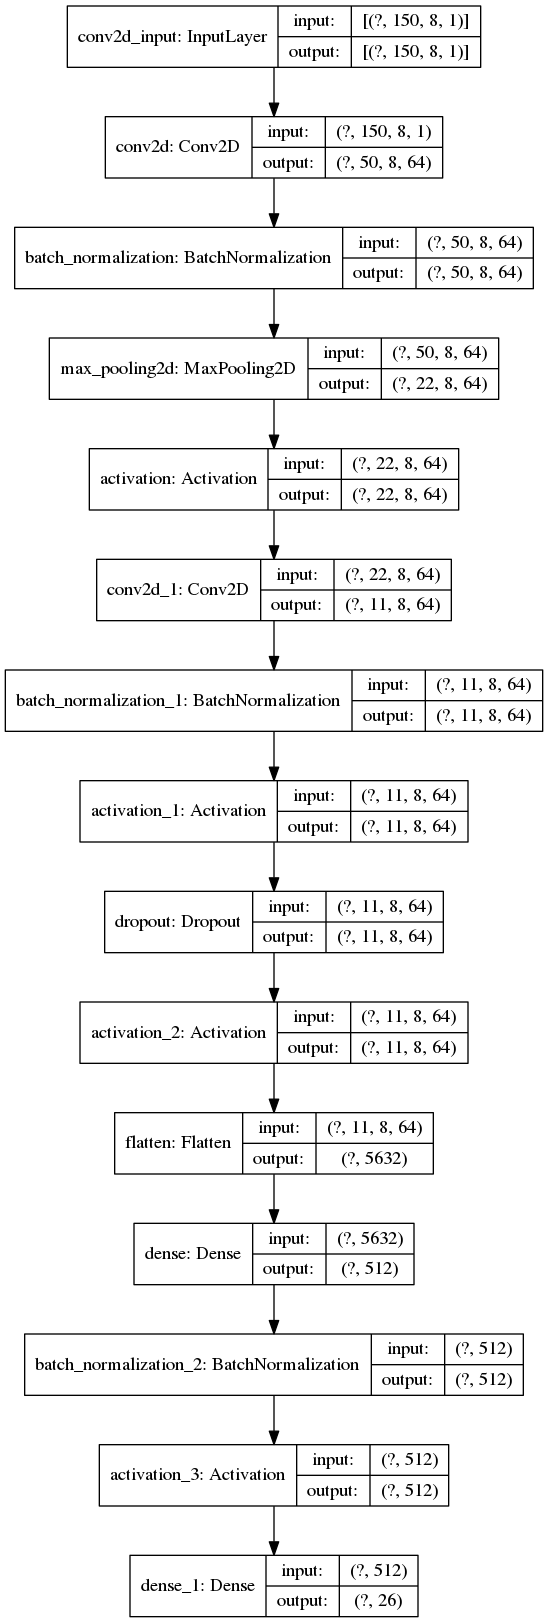

In [45]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/BioPatRec/BioPatRec_WR/CNN120X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [46]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/BioPatRec_WR/CNN120X100/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)


Epoch 1/300
204/204 [==============================] - ETA: 0s - loss: 2.6811 - accuracy: 0.2457
Epoch 00001: val_accuracy improved from -inf to 0.28709, saving model to /media/naveen/nav/mat_codes/BioPatRec/BioPatRec_WR/CNN120X100/checkpoint.hdf5
204/204 [==============================] - 15s 76ms/step - loss: 2.6811 - accuracy: 0.2457 - val_loss: 2.4977 - val_accuracy: 0.2871 - lr: 0.0010
Epoch 2/300
203/204 [============================>.] - ETA: 0s - loss: 2.2898 - accuracy: 0.3567
Epoch 00002: val_accuracy improved from 0.28709 to 0.34965, saving model to /media/naveen/nav/mat_codes/BioPatRec/BioPatRec_WR/CNN120X100/checkpoint.hdf5
204/204 [==============================] - 3s 15ms/step - loss: 2.2894 - accuracy: 0.3568 - val_loss: 2.2967 - val_accuracy: 0.3497 - lr: 0.0010
Epoch 3/300
201/204 [============================>.] - ETA: 0s - loss: 2.0974 - accuracy: 0.4194
Epoch 00003: val_accuracy improved from 0.34965 to 0.38641, saving model to /media/naveen/nav/mat_codes/BioPatRec

Epoch 26/300
201/204 [============================>.] - ETA: 0s - loss: 0.6069 - accuracy: 0.8582
Epoch 00026: val_accuracy did not improve from 0.42113
204/204 [==============================] - 3s 15ms/step - loss: 0.6076 - accuracy: 0.8579 - val_loss: 2.5634 - val_accuracy: 0.4120 - lr: 0.0010
Epoch 27/300
201/204 [============================>.] - ETA: 0s - loss: 0.5809 - accuracy: 0.8649
Epoch 00027: val_accuracy did not improve from 0.42113
204/204 [==============================] - 3s 15ms/step - loss: 0.5816 - accuracy: 0.8646 - val_loss: 2.6583 - val_accuracy: 0.4034 - lr: 0.0010
Epoch 28/300
201/204 [============================>.] - ETA: 0s - loss: 0.5571 - accuracy: 0.8716
Epoch 00028: val_accuracy did not improve from 0.42113
204/204 [==============================] - 3s 15ms/step - loss: 0.5573 - accuracy: 0.8715 - val_loss: 2.6271 - val_accuracy: 0.4180 - lr: 0.0010
Epoch 29/300
201/204 [============================>.] - ETA: 0s - loss: 0.5279 - accuracy: 0.8800
Epoch 00

Epoch 54/300
200/204 [============================>.] - ETA: 0s - loss: 0.2573 - accuracy: 0.9547
Epoch 00054: val_accuracy did not improve from 0.42113
204/204 [==============================] - 3s 15ms/step - loss: 0.2575 - accuracy: 0.9546 - val_loss: 3.3912 - val_accuracy: 0.4026 - lr: 0.0010
Epoch 55/300
202/204 [============================>.] - ETA: 0s - loss: 0.2613 - accuracy: 0.9533
Epoch 00055: val_accuracy did not improve from 0.42113
204/204 [==============================] - 3s 15ms/step - loss: 0.2615 - accuracy: 0.9532 - val_loss: 3.3970 - val_accuracy: 0.4018 - lr: 0.0010
Epoch 56/300
201/204 [============================>.] - ETA: 0s - loss: 0.2552 - accuracy: 0.9554
Epoch 00056: val_accuracy did not improve from 0.42113
204/204 [==============================] - 3s 15ms/step - loss: 0.2558 - accuracy: 0.9551 - val_loss: 3.4014 - val_accuracy: 0.4018 - lr: 0.0010
Epoch 57/300
201/204 [============================>.] - ETA: 0s - loss: 0.2602 - accuracy: 0.9533
Epoch 00

202/204 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9913
Epoch 00080: val_accuracy did not improve from 0.42656
204/204 [==============================] - 3s 15ms/step - loss: 0.1353 - accuracy: 0.9913 - val_loss: 3.5132 - val_accuracy: 0.4245 - lr: 1.0000e-04
Epoch 81/300
202/204 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9919
Epoch 00081: val_accuracy did not improve from 0.42656
204/204 [==============================] - 3s 14ms/step - loss: 0.1342 - accuracy: 0.9919 - val_loss: 3.5053 - val_accuracy: 0.4265 - lr: 1.0000e-04
Epoch 82/300
201/204 [============================>.] - ETA: 0s - loss: 0.1340 - accuracy: 0.9919
Epoch 00082: val_accuracy did not improve from 0.42656
204/204 [==============================] - 3s 14ms/step - loss: 0.1340 - accuracy: 0.9919 - val_loss: 3.5139 - val_accuracy: 0.4249 - lr: 1.0000e-04
Epoch 83/300
200/204 [============================>.] - ETA: 0s - loss: 0.1313 - accuracy: 0.9921
Epoch 000

Epoch 106/300
201/204 [============================>.] - ETA: 0s - loss: 0.1140 - accuracy: 0.9949
Epoch 00106: val_accuracy did not improve from 0.42861
204/204 [==============================] - 3s 15ms/step - loss: 0.1139 - accuracy: 0.9949 - val_loss: 3.5831 - val_accuracy: 0.4261 - lr: 1.0000e-04
Epoch 107/300
201/204 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9950
Epoch 00107: val_accuracy did not improve from 0.42861
204/204 [==============================] - 3s 15ms/step - loss: 0.1128 - accuracy: 0.9950 - val_loss: 3.5821 - val_accuracy: 0.4276 - lr: 1.0000e-04
Epoch 108/300
200/204 [============================>.] - ETA: 0s - loss: 0.1121 - accuracy: 0.9950
Epoch 00108: val_accuracy did not improve from 0.42861
204/204 [==============================] - 3s 15ms/step - loss: 0.1121 - accuracy: 0.9950 - val_loss: 3.5948 - val_accuracy: 0.4274 - lr: 1.0000e-04
Epoch 109/300
201/204 [============================>.] - ETA: 0s - loss: 0.1121 - accuracy:

In [47]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 94
train accuracy and validation accuracy 0.9940178990364075 0.4286070466041565


In [48]:
model.save('/media/naveen/nav/mat_codes/BioPatRec/BioPatRec_WR/CNN120X100/CNN_LSTM_nina_5X97')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/BioPatRec/BioPatRec_WR/CNN120X100/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


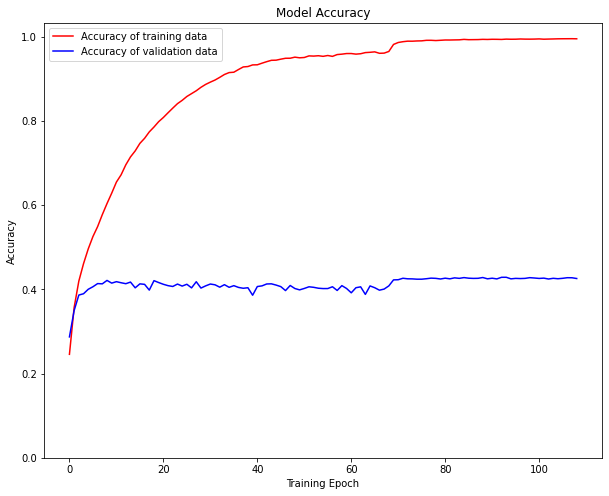

In [49]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


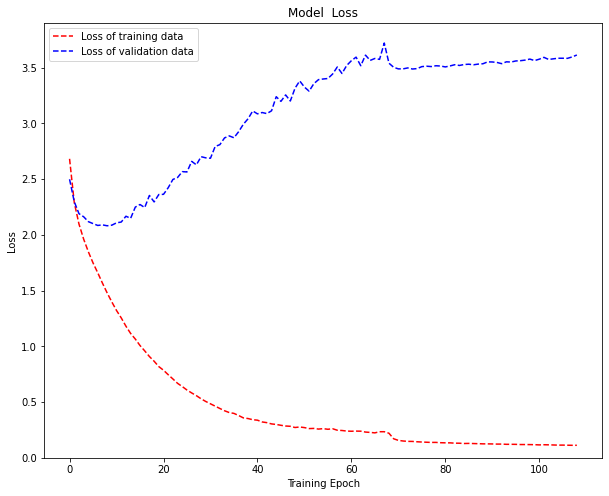

In [50]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [51]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

102/102 [==============================] - 1s 7ms/step - loss: 3.5510 - accuracy: 0.4286
test_accuracy 0.4286070466041565


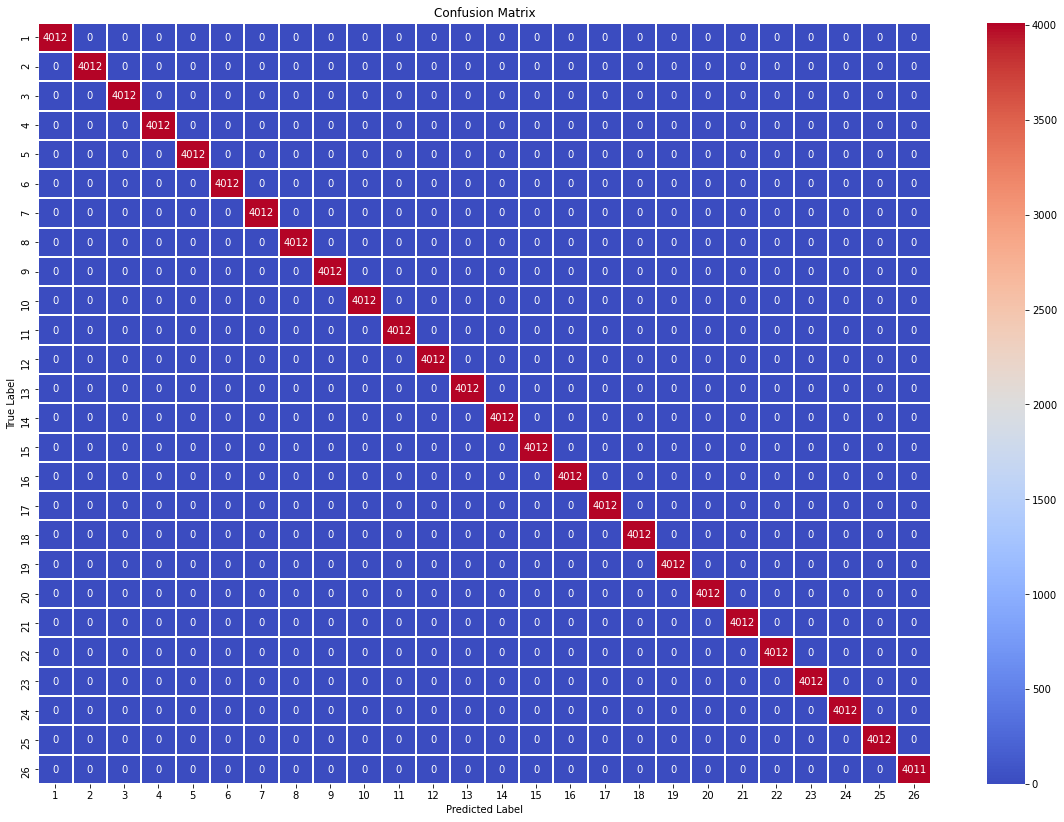

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4012
           1       1.00      1.00      1.00      4012
           2       1.00      1.00      1.00      4012
           3       1.00      1.00      1.00      4012
           4       1.00      1.00      1.00      4012
           5       1.00      1.00      1.00      4012
           6       1.00      1.00      1.00      4012
           7       1.00      1.00      1.00      4012
           8       1.00      1.00      1.00      4012
           9       1.00      1.00      1.00      4012
          10       1.00      1.00      1.00      4012
          11       1.00      1.00      1.00      4012
          12       1.00      1.00      1.00      4012
          13       1.00      1.00      1.00      4012
          14       1.00      1.00      1.00      4012
          15       1.00      1.00      1.00      4012
          16       1.00      1.00      1.00      4012
          17       1.00    

In [52]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

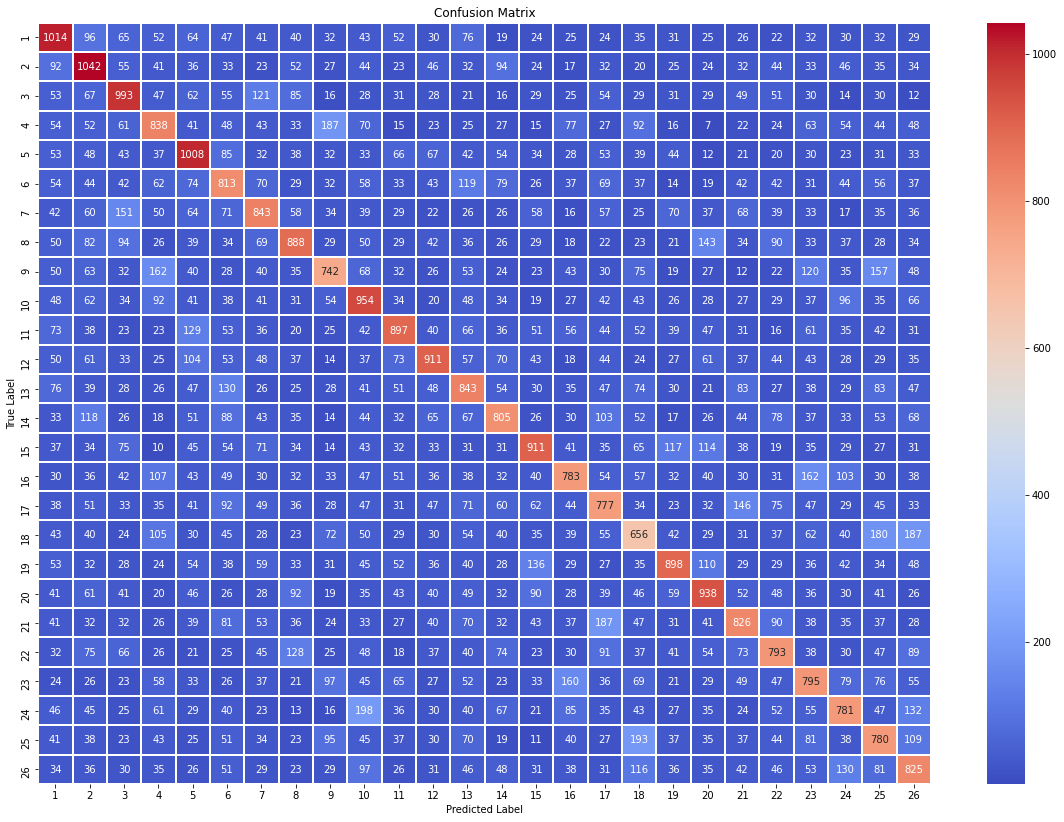

              precision    recall  f1-score   support

           0       0.46      0.51      0.48      2006
           1       0.44      0.52      0.48      2006
           2       0.47      0.50      0.48      2006
           3       0.41      0.42      0.41      2006
           4       0.45      0.50      0.48      2006
           5       0.38      0.41      0.39      2006
           6       0.43      0.42      0.42      2006
           7       0.47      0.44      0.45      2006
           8       0.42      0.37      0.40      2006
           9       0.42      0.48      0.44      2006
          10       0.49      0.45      0.47      2006
          11       0.50      0.45      0.48      2006
          12       0.40      0.42      0.41      2006
          13       0.44      0.40      0.42      2006
          14       0.49      0.45      0.47      2006
          15       0.43      0.39      0.41      2006
          16       0.38      0.39      0.38      2006
          17       0.33    

In [53]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [54]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))